In [7]:
import pandas as pd
import numpy as np

import EDA
import regression
import outlier


df = pd.read_csv('ship-data.csv')
train_index = int(df.shape[0] * .8)
df_train = df[:train_index]
df_test = df[train_index:]

In [8]:
xtr = df_train['Speed Through Water (knots)'].values.reshape(-1, 1)
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test['Speed Through Water (knots)'].values.reshape(-1, 1)
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

model = regression.Lr(xtr, ytr)
model.fit()

model.model.fit(xtr, ytr)
model.model.score(xte, yte)

Train set accuracy:
0.8662959328379267
Test set accuracy:
0.8742798379842545


0.8774860448374928

In [9]:
v = df[df.columns[11]].values
u = df[df.columns[12]].values
x = np.concatenate([v.reshape(-1, 1), u.reshape(-1, 1)], axis=1)
prd = outlier.Rc(x).fit(.002)

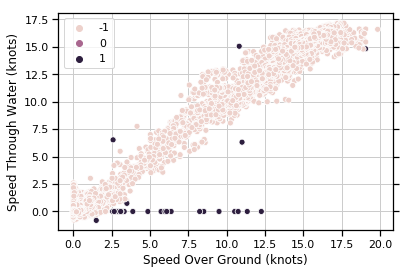

In [11]:
EDA.Visual(df).scatter(df.columns[11], df.columns[12], hue=-prd)

In [16]:
df.loc[prd == -1, 'Speed Through Water (knots)'] = df.loc[prd == -1, 'Speed Over Ground (knots)']

In [18]:
df_train = df[:train_index]
df_test = df[train_index:]
xtr = df_train['Speed Through Water (knots)'].values.reshape(-1, 1)
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test['Speed Through Water (knots)'].values.reshape(-1, 1)
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

model = regression.Lr(xtr, ytr)
model.fit()

model.model.fit(xtr, ytr)
model.model.score(xte, yte)

Train set accuracy:
0.8675256542320746
Test set accuracy:
0.8752097347760639


0.8846853125411169

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


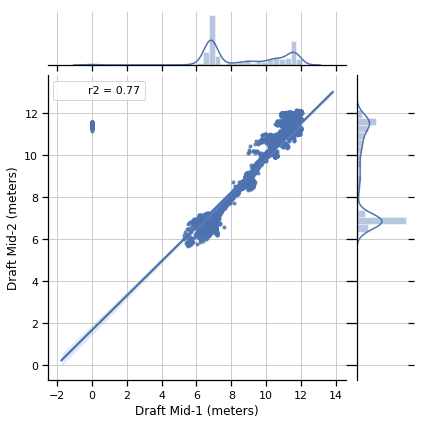

In [19]:
EDA.Visual(df).pair(df.columns[6], df.columns[7])

In [30]:
v = df[df.columns[6]].values
u = df[df.columns[7]].values
x = np.concatenate([v.reshape(-1, 1), u.reshape(-1, 1)], axis=1)
prd = outlier.Rc(x).fit(.005)

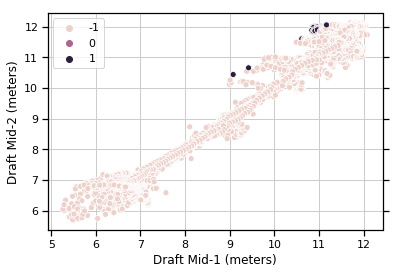

In [31]:
EDA.Visual(df).scatter(df.columns[6], df.columns[7], hue=-prd)

In [29]:
df.loc[df[df.columns[6]]==0, df.columns[6]] = df.loc[df[df.columns[6]]==0, df.columns[7]]

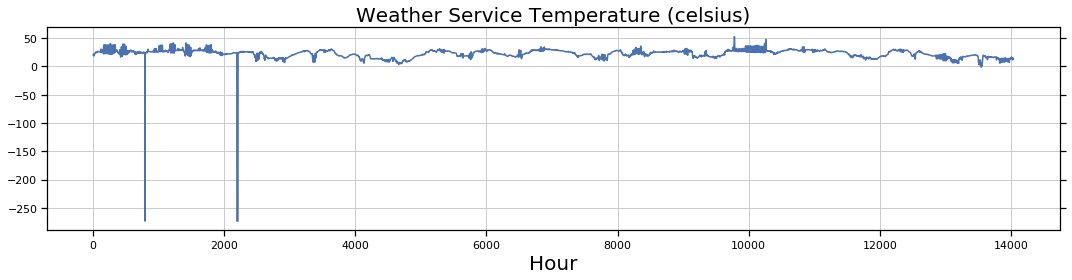

count    14040.000000
mean        21.795470
std         13.760469
min       -273.150000
25%         18.120077
50%         23.808502
75%         26.921003
max         52.559168
Name: Weather Service Temperature (celsius), dtype: float64


In [33]:
vs = EDA.Visual(df)
vs.plot(df.columns[19])